loading annotations into memory...
Done (t=0.79s)
creating index...
index created!


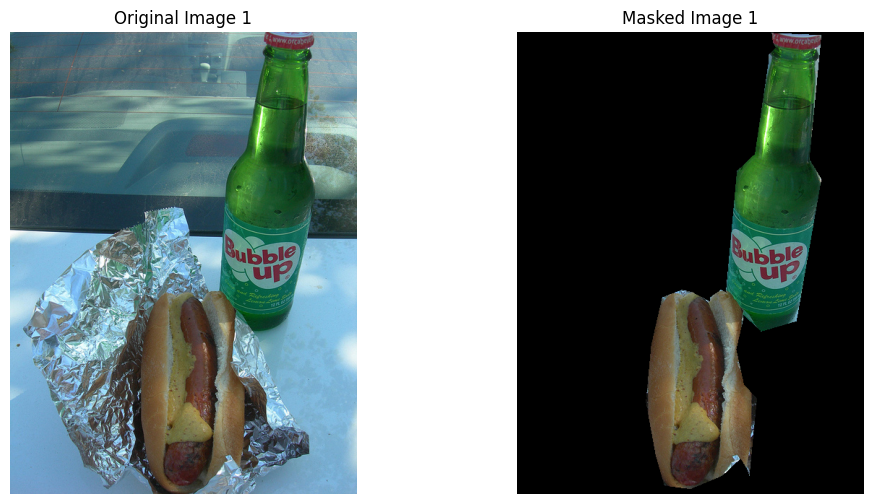

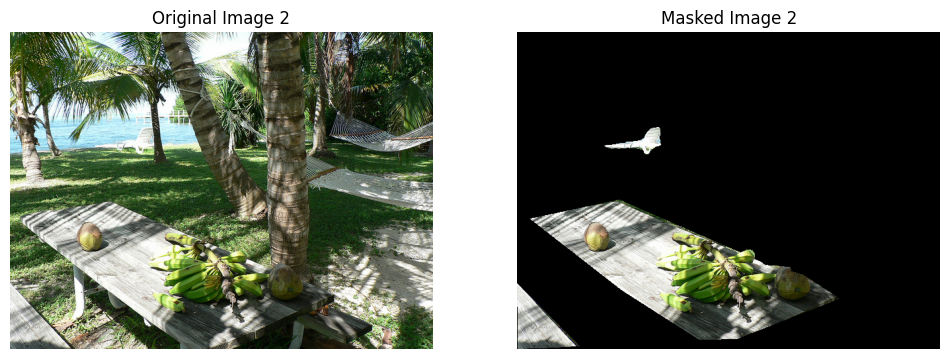

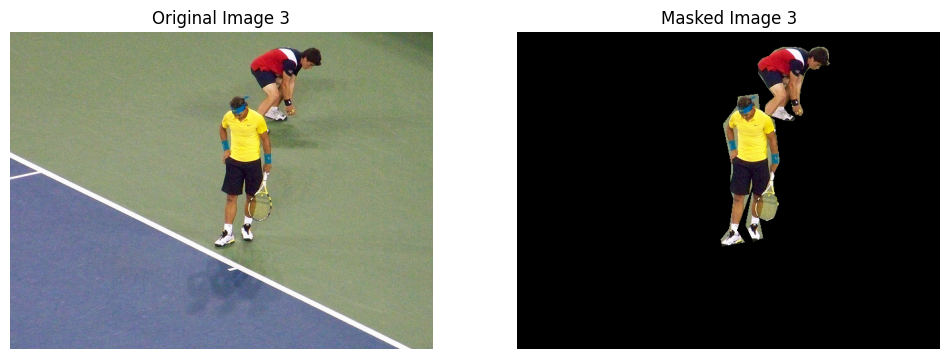

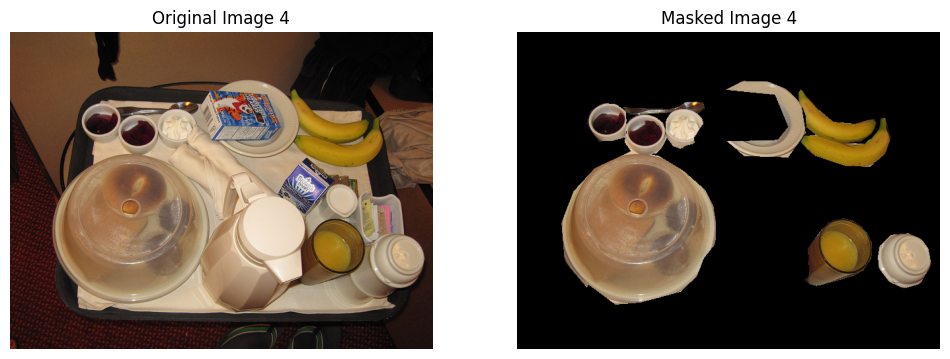

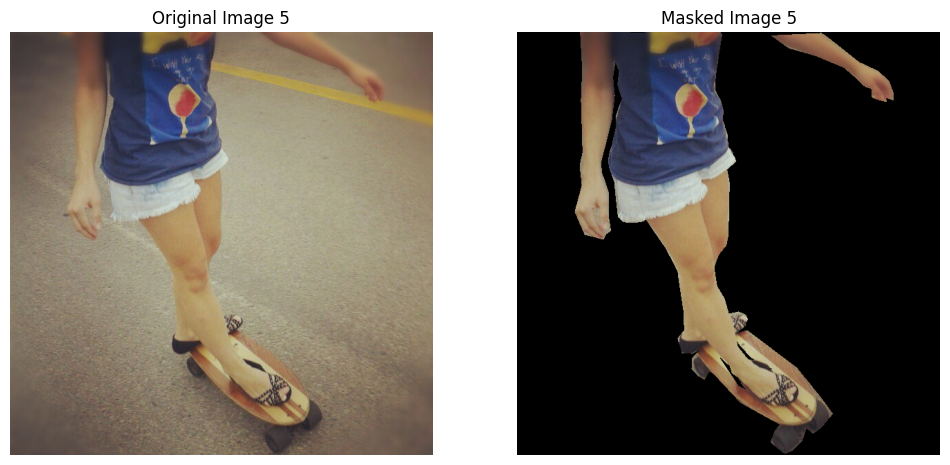

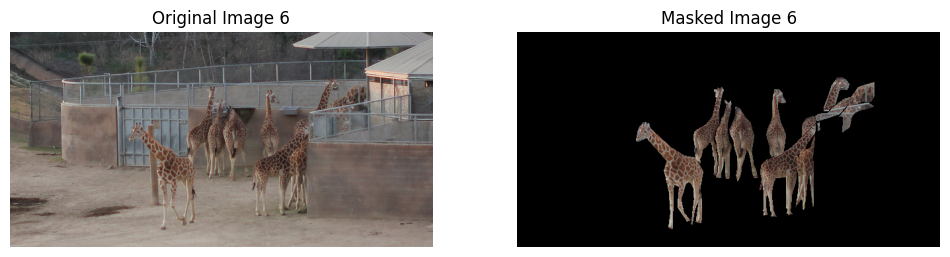

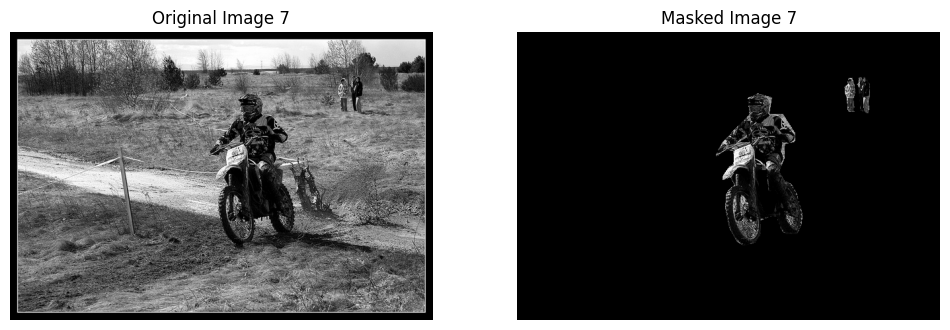

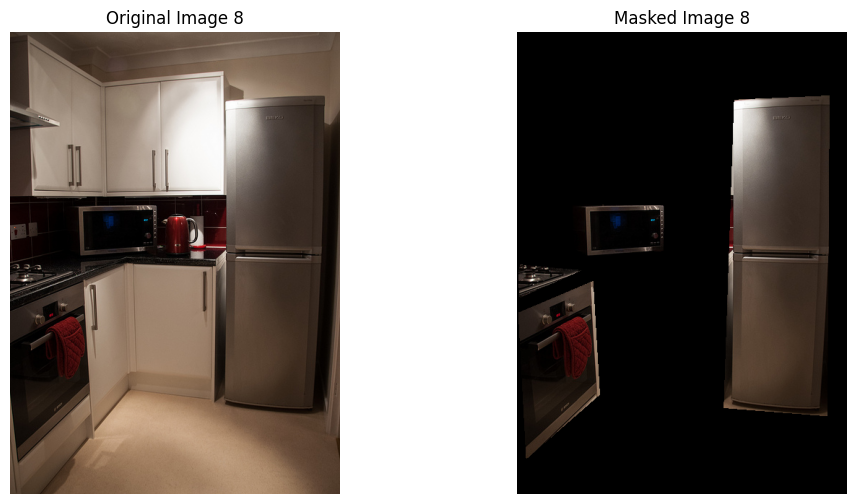

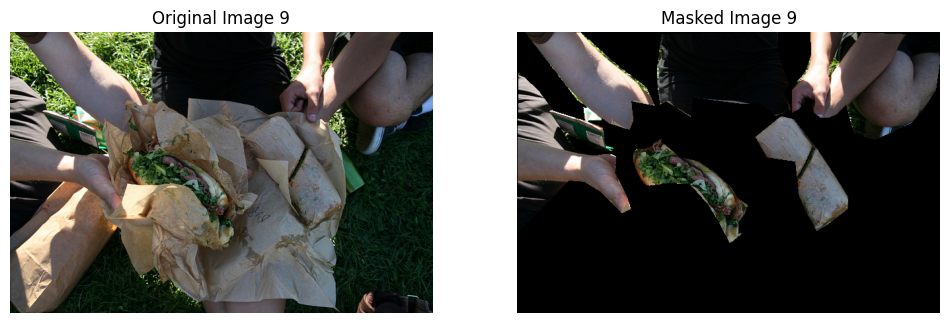

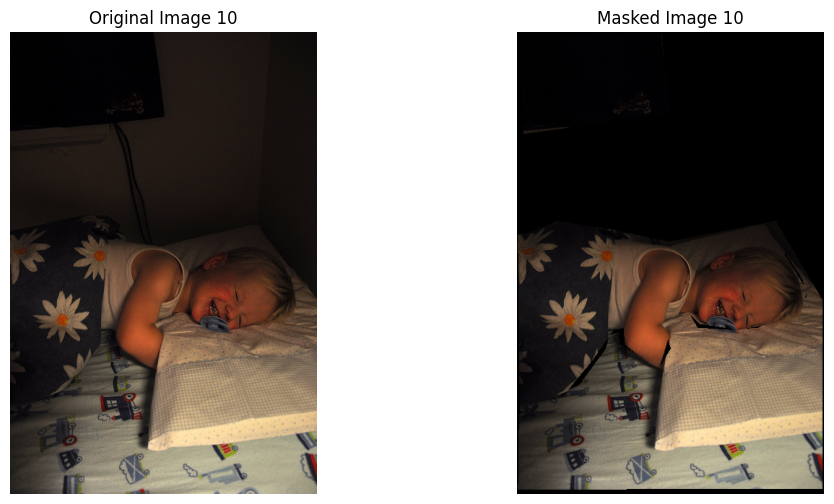

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image
import random

# Path setup
dataDir = r"C:/Users/rahul/Downloads/coco"
dataType = "val2017"
annFile = f"{dataDir}/annotations/instances_{dataType}.json"

# Initialize COCO API
coco = COCO(annFile)

# Get all image IDs
imgIds = coco.getImgIds()

# Select 10 random images
random_ids = random.sample(imgIds, 10)

for i, imgId in enumerate(random_ids):
    img = coco.loadImgs(imgId)[0]
    I = Image.open(os.path.join(f"{dataDir}/{dataType}", img['file_name'])).convert("RGB")
    I_np = np.array(I)

    # Load annotations
    annIds = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(annIds)

    # Create an empty mask
    mask = np.zeros((img['height'], img['width']), dtype=np.uint8)

    # Combine all object masks into one binary mask
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann))

    # Apply mask to original image (objects visible, background black)
    masked_img = I_np * mask[:, :, None]   # broadcast mask to 3 channels

    # Show image and masked image side by side
    plt.figure(figsize=(12,6))

    # Original image
    plt.subplot(1,2,1)
    plt.imshow(I)
    plt.axis('off')
    plt.title(f"Original Image {i+1}")

    # Masked image (background removed)
    plt.subplot(1,2,2)
    plt.imshow(masked_img)
    plt.axis('off')
    plt.title(f"Masked Image {i+1}")

    plt.show()


